<a href="https://colab.research.google.com/github/PraveenRautela/Cat-vs-Dog-Classifier/blob/main/cat_v_dog_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:09<00:00, 125MB/s]
100% 1.06G/1.06G [00:09<00:00, 118MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Normalize
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [46]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [48]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [49]:
# Creating CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit(train_generator,epochs=10,validation_data = validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 352s 551ms/step - accuracy: 0.5400 - loss: 0.7103 - val_accuracy: 0.6514 - val_loss: 0.6421
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 374s 541ms/step - accuracy: 0.6190 - loss: 0.6497 - val_accuracy: 0.6504 - val_loss: 0.6308
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 369s 522ms/step - accuracy: 0.6953 - loss: 0.5843 - val_accuracy: 0.7704 - val_loss: 0.4833
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 378s 513ms/step - accuracy: 0.7340 - loss: 0.5355 - val_accuracy: 0.7728 - val_loss: 0.4831
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 381s 513ms/step - accuracy: 0.7522 - loss: 0.5015 - val_accuracy: 0.7832 - val_loss: 0.4460
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 325s 515ms/step - accuracy: 0.7566 - loss: 0.4938 - val_accuracy: 0.7862 - val_loss: 0.4583
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 384s 518ms/step - accuracy: 0.7778 - loss: 0.4703 - val_accuracy: 0.8100 - val_loss: 0.4085
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 511ms/step - accuracy: 0.7811 - loss: 0.46

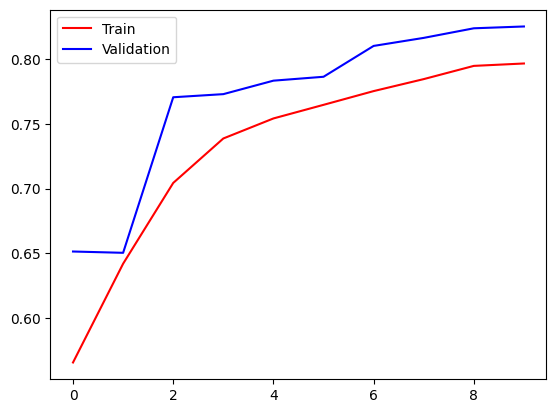

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.legend()
plt.show()

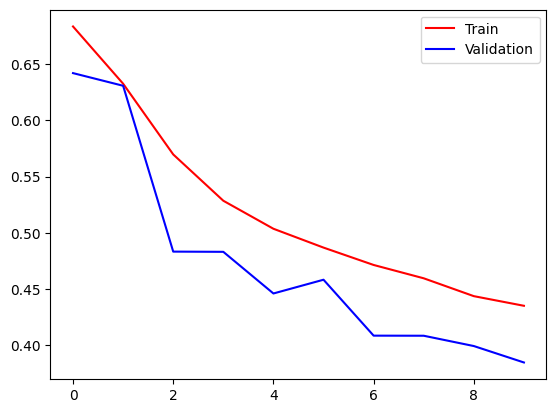

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='Train')
plt.plot(history.history['val_loss'],color='blue',label='Validation')
plt.legend()
plt.show()

In [55]:
import cv2

In [96]:
test_img = cv2.imread('/content/cat2.jpg')

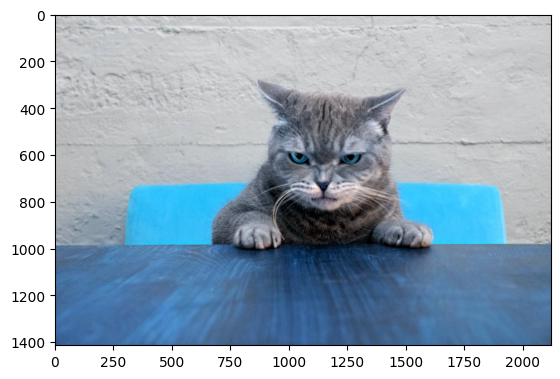

In [97]:
plt.imshow(test_img)

In [98]:
test_img.shape

(1414, 2121, 3)

In [99]:
test_img = cv2.resize(test_img,(256,256))

In [100]:
test_input = test_img.reshape(1,256,256,3)

In [101]:
import numpy as np

predictions = model.predict(test_input)

Binary_predictions = np.where(predictions >= 0.5, 1, 0)

print(Binary_predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0]
